# AutoML技术
自动对数据抽取特征并进行模型训练

- 大部分automl框架是基于超参数搜索模型
- Autogluon则依赖于融合多个无需超参数搜索的模型，三个臭皮匠胜过诸葛亮

## Autogluon

### 技术一：stacking
- 同一数据上独立训练多个模型，如svm 树模型 核方法，KNN
- 然后对上述模型做线性组合,输出模型权重和，权重训练得到的，默认predict.fit使用

### 技术二：K-则交叉bagging
- 对stacking中的每个模型做交叉验证，最后取平均
- fit(..,num_bag_folds=3)， 3折交叉验证

### 技术三：多层stacking
- 单个模型输出跟数据做stacking，可以重复多层，一般为了模型深度不过于太深，通常配合K折bagging使用，即这里每个模型是k个模型的bagging，给下一层stacking的输出是指bagging模型在验证集上的输出的合并

- fit(..., num_stake_levels=1, num_bag_folds=3),高精度模型时使用，计算开销成倍增加
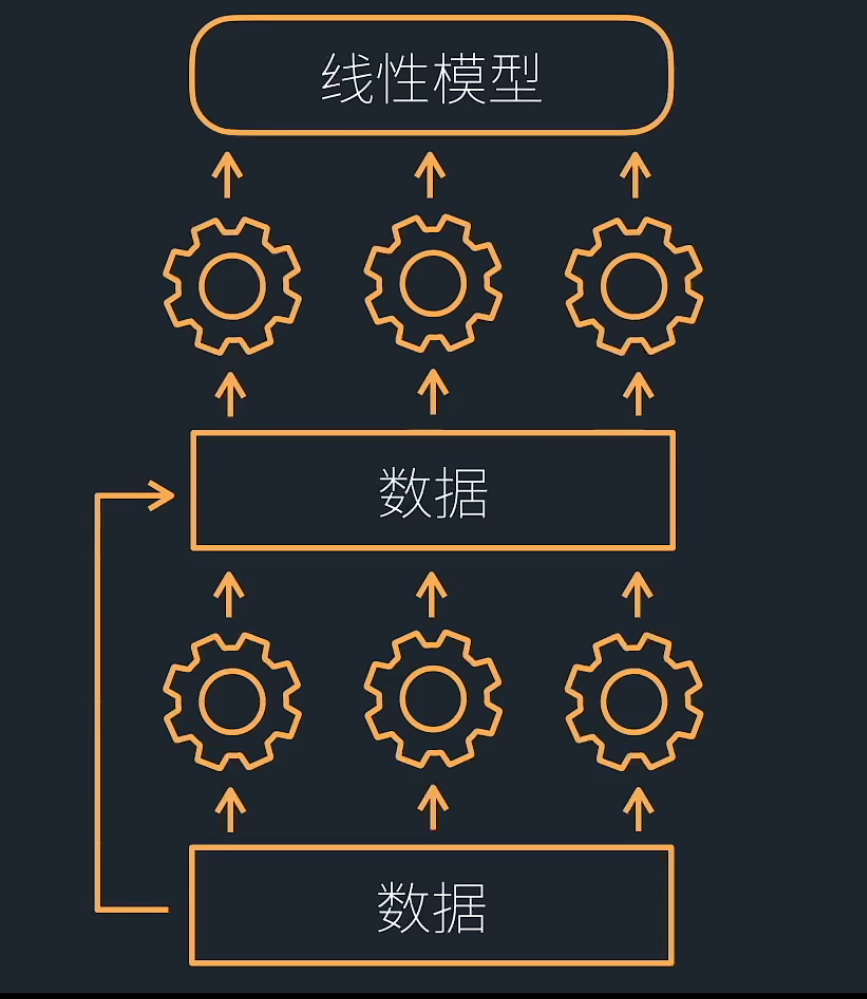

## AutoML性能
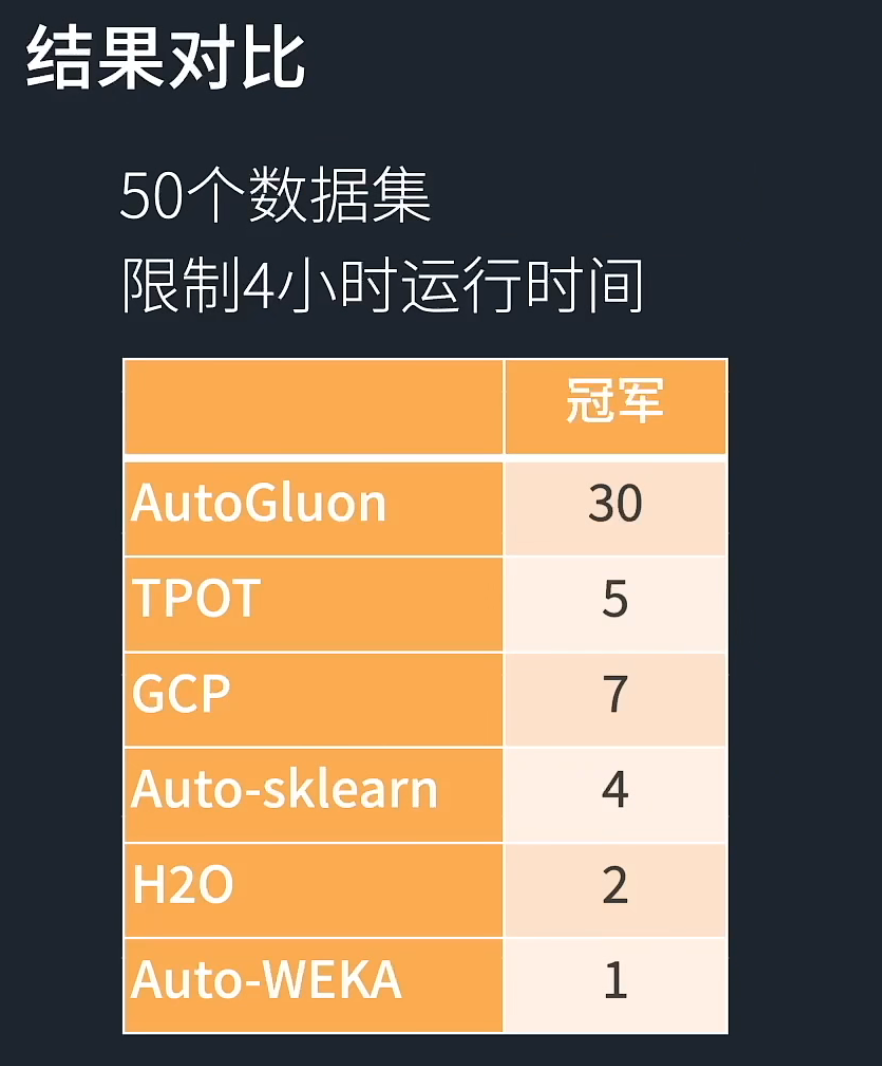


# 比赛答疑
#### 调参的程度？调多了可能overfiting？
- 参数肯定要调节的，但是grid搜索出来的点，可能泛化性不太好
- 通常可以在调节出来的那个点附近，选一个值，如果比较敏感，可能泛化性不好
- 调参其实一般竞赛多用，实际中调参没那么重要，真实情况下数据会不断变，过段时间数据变了参数又变了

#### AutoML与ML有严格的特征区别吗？
- 一般AutoML是对已经抽出来样本了没有提取好特征的情况下来做

#### 在空调cooling和heating上，如果做独热编码，会拆分成上千个特征，如果做一些处理，比如单词出现与否，这样特征项大幅减少，怎么样？
- 思路不错，但是很可能效果一般，没必要花大量时间在这上面，稍微试下，效果一般就别做了

#### 人生就是SGD 
#### 不要尝试MLP做股票，做不了的，随机性太强
#### 为什么AutoGluon在处理表格数据，需要指定时间，有特定顺序训练模型，比如最后训练深度学习？
- 由于需要快速先出个结果，然后再出最好结果，防止cancel有个模型出来